# Analysis of stock prices in different time periods


In [1]:
from analysis import Column,get_best_month_day

import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

START_DATE = "2011-01-01"
END_DATE = "2021-01-01"
FILENAME = "sp500.csv"
LIMIT = None


def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    for i, func in enumerate(funcs):
        ax = axs[i]

        data = kwargs['data']
        x = kwargs['x']

        if func == lineplot:
            data[x] = data[x].astype(float)
        elif func == barplot:
            Y = data[kwargs['y']]
            ax.set_ylim(Y.quantile(0.20), Y.quantile(0.80))
            
        func(**kwargs, ax=ax)

    fig.tight_layout()

## Daily stock price fluctuations within a month

In [2]:
df = get_best_month_day(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

in 2010.12
2021-05-10 23:33:07.456 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for PEP in 2010.12
2021-05-10 23:33:07.569 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for AOS in 2010.12
2021-05-10 23:33:07.575 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for WST in 2010.12
2021-05-10 23:33:07.696 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for FISV in 2010.12
2021-05-10 23:33:07.717 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for BIIB in 2010.12
2021-05-10 23:33:07.774 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for A in 2010.12
2021-05-10 23:33:07.871 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for ES in 2010.12
2021-05-10 23:33:07.884 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for SLB in 2010.12
2021-05-10 23:33:07.943 | DEBUG    | analysis:_get_month_day_diffs:191 - Not enough data for HPE in 2015.10
2021-05-10 23:33:0

KeyError: "None of [Index(['year', 'month', 'day', 'percent'], dtype='object')] are in the [columns]"

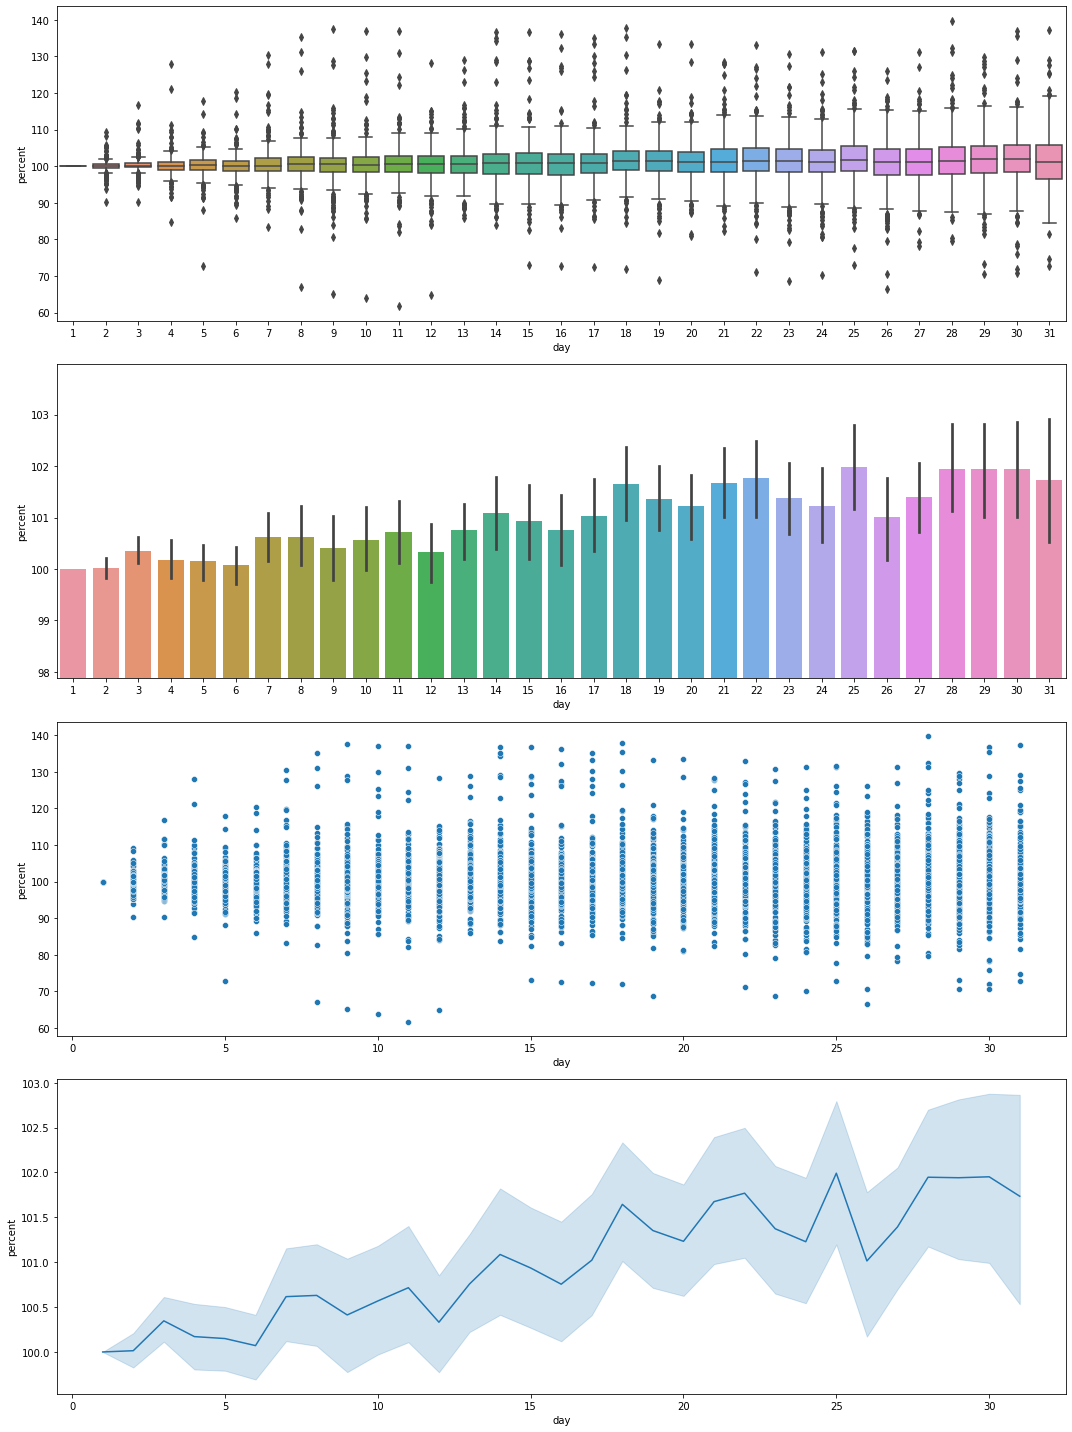

In [18]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Monthly stock price fluctuations within a year

In [19]:
from analysis import get_best_month

df = get_best_month(FILENAME, START_DATE, END_DATE, limit=LIMIT)
df

[*********************100%***********************]  5 of 5 completed
2021-05-10 23:28:07.896 | DEBUG    | analysis:_get_monthly_diffs:138 - Not enough data for ABMD in 2010
2021-05-10 23:28:07.938 | DEBUG    | analysis:_get_monthly_diffs:138 - Not enough data for MMM in 2010
2021-05-10 23:28:07.944 | DEBUG    | analysis:_get_monthly_diffs:138 - Not enough data for AOS in 2010
2021-05-10 23:28:07.944 | DEBUG    | analysis:_get_monthly_diffs:138 - Not enough data for ABT in 2010


year  month     percent
0   2013      1       100.0
1   2013      2   104.36257
2   2013      3   107.61859
3   2013      4  120.521255
4   2013      5  127.502798
..   ...    ...         ...
92  2018      8  108.576223
93  2018      9  114.358172
94  2018     10  116.472807
95  2018     11  117.806165
96  2018     12   117.67935

[456 rows x 3 columns]

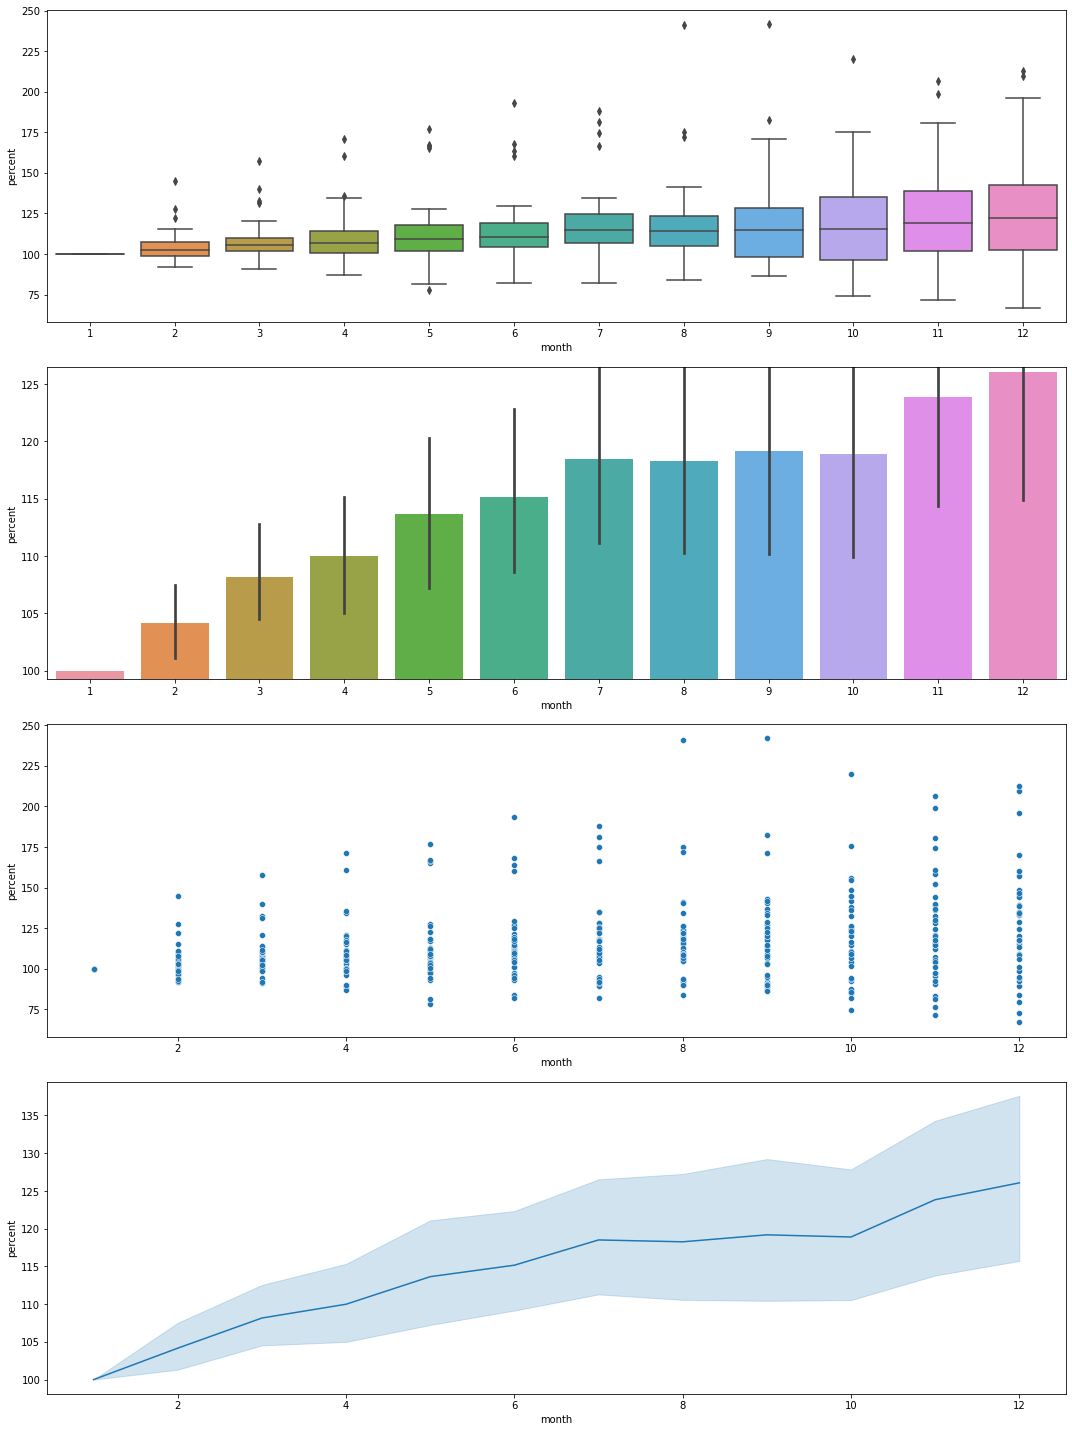

In [20]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [21]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


year  week  weekday     percent
249   2011    52        1       100.0
250   2011    52        2  100.816028
251   2011    52        3     98.4916
252   2011    52        4  100.544019
1     2011     1        0       100.0
...    ...   ...      ...         ...
2007  2018    51        4   99.482776
2008  2018    52        0       100.0
2009  2018    52        2   99.870359
2010  2018    52        3  103.653504
2011  2018    52        4  106.175602

[9553 rows x 4 columns]

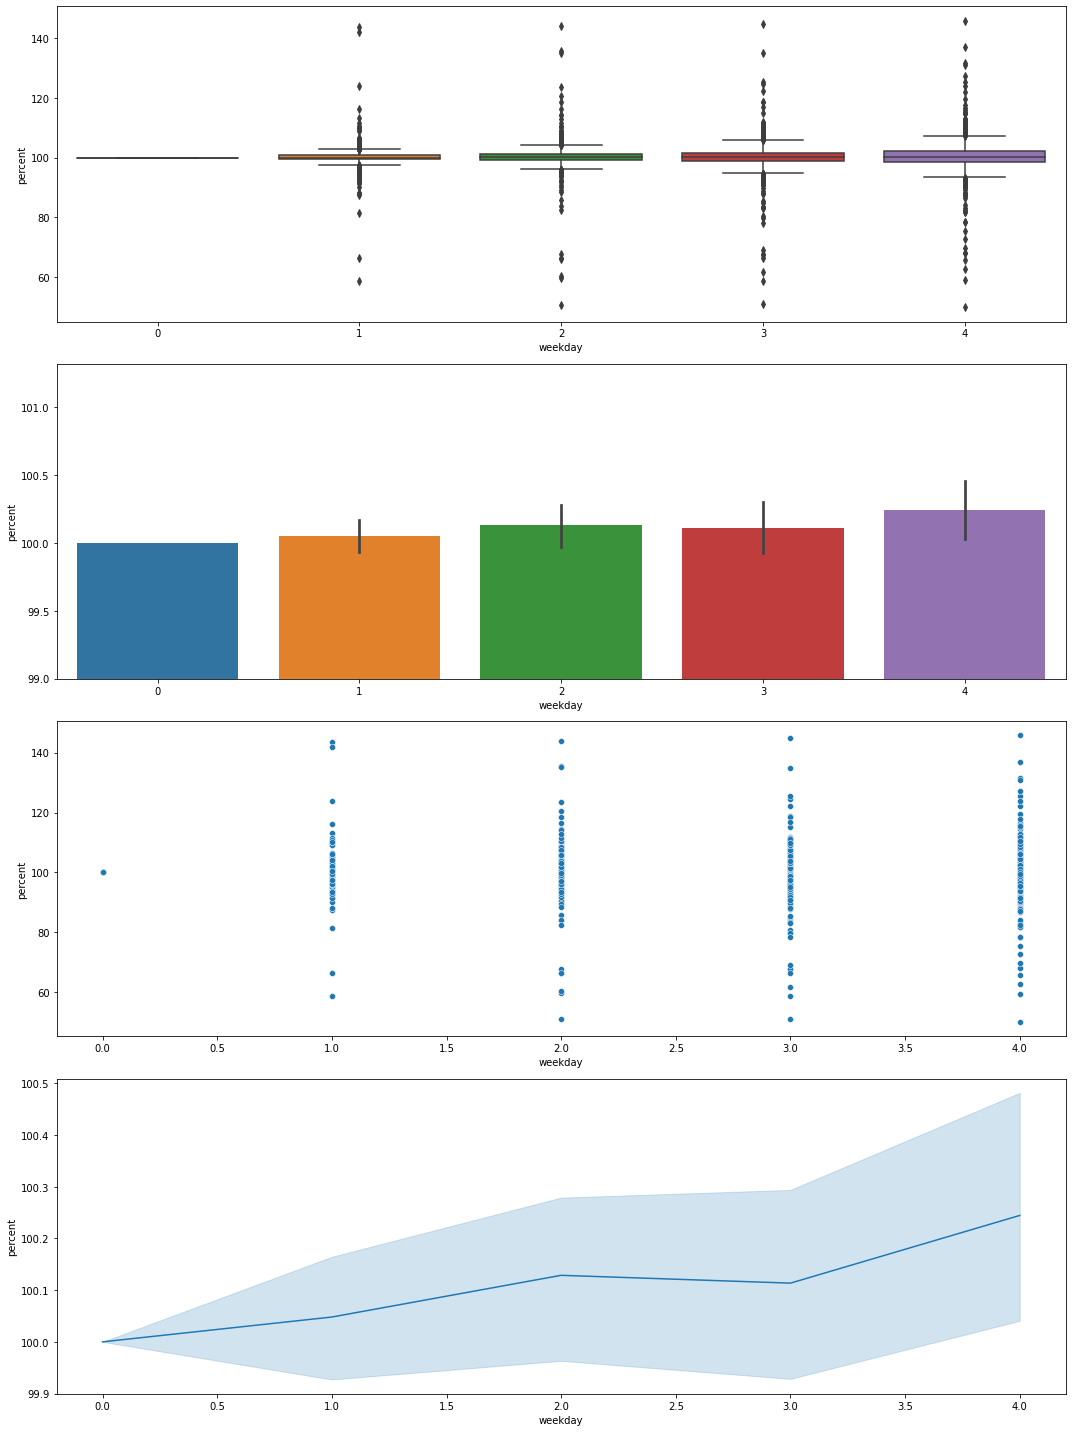

In [22]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Hourly stock price fluctuations

In [23]:
from analysis import get_best_hour

START_DATE = '2019-06-01'
END_DATE = '2021-05-01'

df = get_best_hour(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed
2021-05-10 23:28:16.759 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for ABBV in 27 3
2021-05-10 23:28:16.759 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for AOS in 27 3
2021-05-10 23:28:16.764 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for ABT in 27 3
2021-05-10 23:28:16.814 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for MMM in 27 3
2021-05-10 23:28:16.829 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for ABMD in 27 3
2021-05-10 23:28:17.784 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for AOS in 48 29
2021-05-10 23:28:17.789 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for ABT in 48 29
2021-05-10 23:28:17.832 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for MMM in 48 29
2021-05-10 23:28:17.863 | DEBUG    | analysis:_get_hour_diffs:242 - Not enough data for ABBV in 48 29
2021-05-10 23:28:17.918 

year  week  day  hour     percent
0     2019    23    3     9       100.0
1     2019    23    3    10  100.548394
2     2019    23    3    11  101.458421
3     2019    23    3    12  100.448682
4     2019    23    3    13  100.922304
...    ...   ...  ...   ...         ...
3361  2021    17   30    11   99.506591
3362  2021    17   30    12  100.080736
3363  2021    17   30    13  100.053824
3364  2021    17   30    14  100.130077
3365  2021    17   30    15   100.20633

[16727 rows x 5 columns]

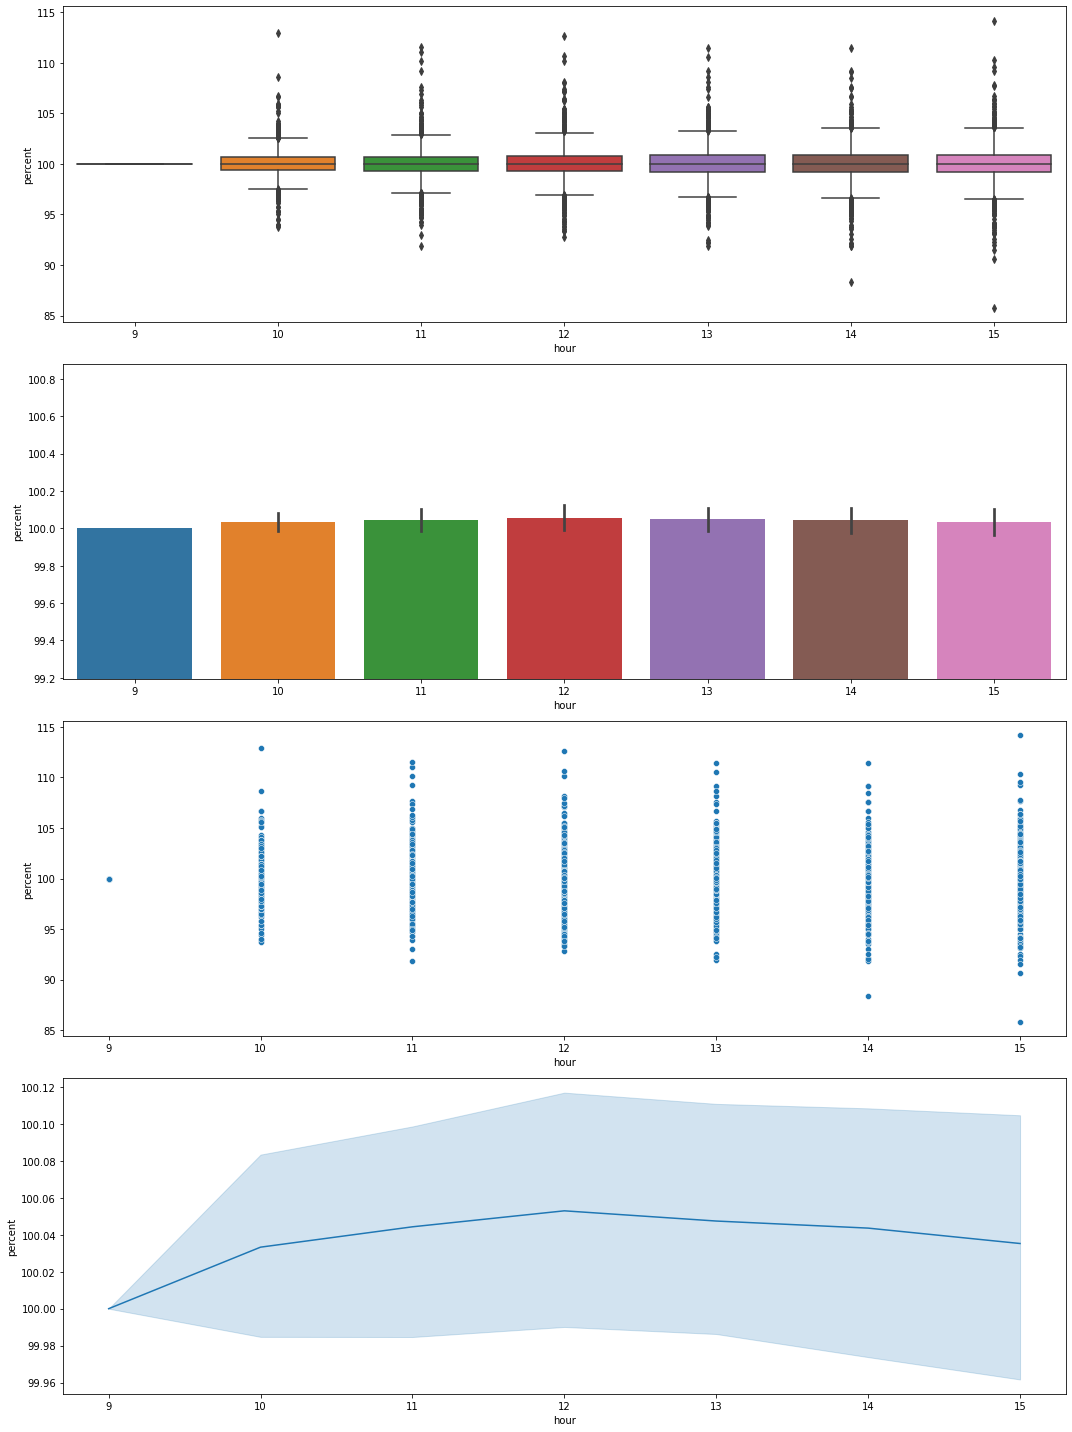

In [24]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [25]:
from analysis import get_best_quarter

START_DATE = '2021-04-01'
END_DATE = '2021-05-01'

df = get_best_quarter(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


year  week  day  hour  minute  quarter     percent
0    2021    13    1     9      30       30       100.0
1    2021    13    1     9      45       45   99.296248
2    2021    13    1    10       0        0       100.0
3    2021    13    1    10      15       15   99.812226
4    2021    13    1    10      30       30   99.702688
..    ...   ...  ...   ...     ...      ...         ...
541  2021    17   30    14      45       45  100.236006
542  2021    17   30    15       0        0       100.0
543  2021    17   30    15      15       15   99.813611
544  2021    17   30    15      30       30   99.916129
545  2021    17   30    15      45       45   99.751478

[2730 rows x 7 columns]

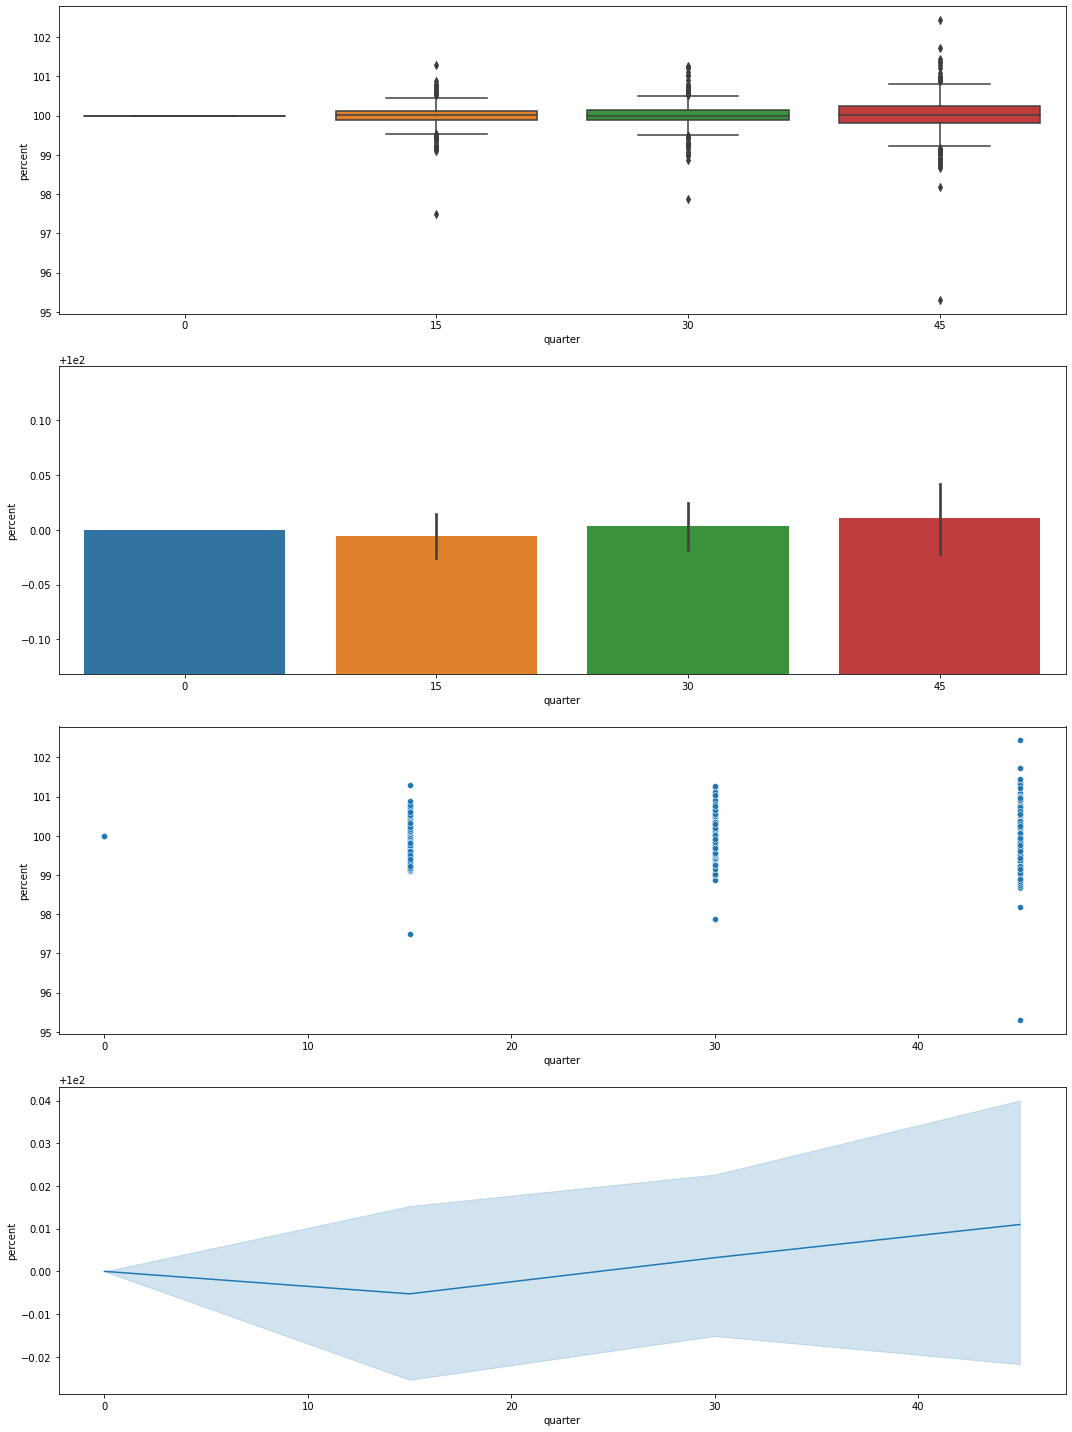

In [26]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within an hour

In [27]:
from analysis import get_best_time

df = get_best_time(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


year  week  day  hour  minute   time     percent
0    2021    13    1     9      30    9.5       100.0
1    2021    13    1     9      45   9.75   99.268376
2    2021    13    1    10       0   10.0       100.0
3    2021    13    1    10      15  10.25    99.56953
4    2021    13    1    10      30   10.5  100.057593
..    ...   ...  ...   ...     ...    ...         ...
541  2021    17   30    14      45  14.75  100.236006
542  2021    17   30    15       0   15.0       100.0
543  2021    17   30    15      15  15.25   99.813611
544  2021    17   30    15      30   15.5   99.916129
545  2021    17   30    15      45  15.75   99.751478

[2730 rows x 7 columns]

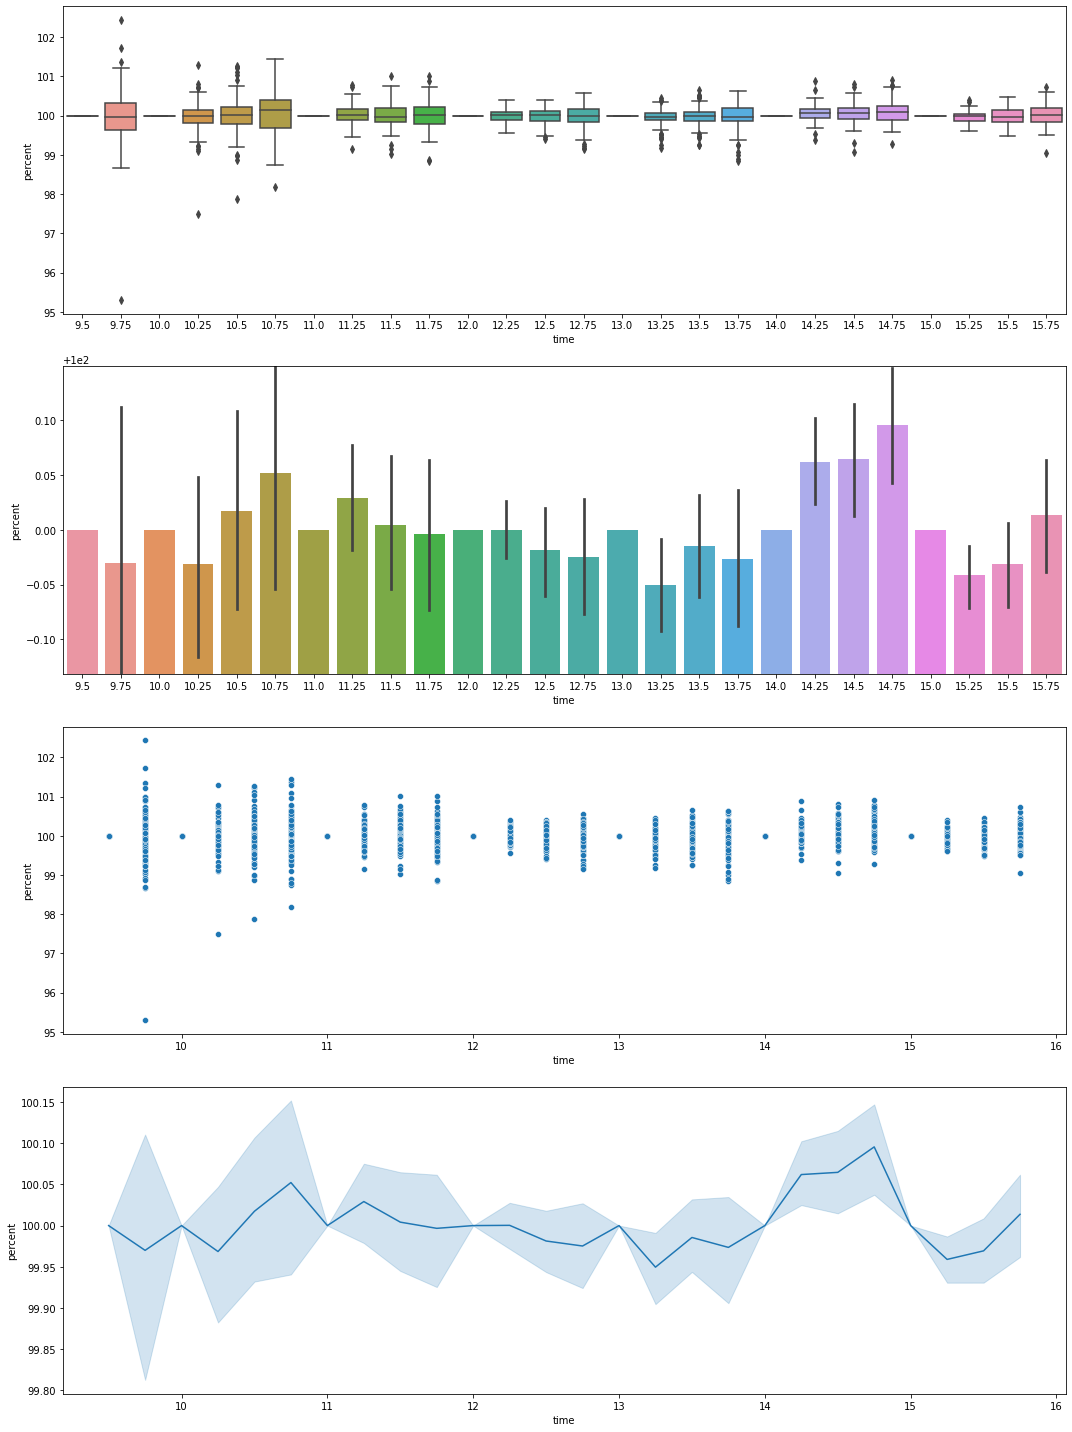

In [28]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)